In [1]:
import warnings
warnings.filterwarnings('ignore')
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
%pylab inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn import neighbors
from sklearn.preprocessing import scale


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Aemf1 2.csv')
data.columns


Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [18]:
data.groupby(['Guest_Satisfaction'])['Price'].count()/len(data)

Guest_Satisfaction
0    0.002229
1    0.002613
2    0.011004
3    0.088939
4    0.895215
Name: Price, dtype: float64

In [4]:
data['Guest_Satisfaction']= pd.cut(data['Guest Satisfaction'],[19, 36, 52, 68, 84,101],labels=[0,1,2,3,4]).astype(int)

city_g = data.groupby('City')['Guest_Satisfaction'].median().reset_index().rename(columns={'Guest_Satisfaction':'City_st'})
data = data.merge(city_g, on='City',how='left')

data['Entire_room_st'] = np.where(data['Room Type']=='Entire home/apt',1,0)
data['Weekend_st']= pd.get_dummies(data['Day'], drop_first=True)
data['Superhost_st'] = pd.get_dummies(data['Superhost'], drop_first=True)
data['Shared Room'] = pd.get_dummies(data['Shared Room'], drop_first=True)


data.head()



,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,...,Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Guest_Satisfaction,City_st,Entire_room_st,Weekend_st,Superhost_st
0,Amsterdam,194.033698,Weekday,Private room,0,True,2.0,False,1,0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4,4.0,0,0,0
1,Amsterdam,344.245776,Weekday,Private room,0,True,4.0,False,0,0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4,4.0,0,0,0
2,Amsterdam,264.101422,Weekday,Private room,0,True,2.0,False,0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4,4.0,0,0,0
3,Amsterdam,433.529398,Weekday,Private room,0,True,4.0,False,0,1,...,0.439876,493.272534,26.119108,875.033098,60.973565,4,4.0,0,0,0
4,Amsterdam,485.552926,Weekday,Private room,0,True,2.0,True,0,0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4,4.0,0,0,1


In [5]:
data.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'Guest_Satisfaction', 'City_st',
       'Entire_room_st', 'Weekend_st', 'Superhost_st'],
      dtype='object')

<AxesSubplot:xlabel='City'>

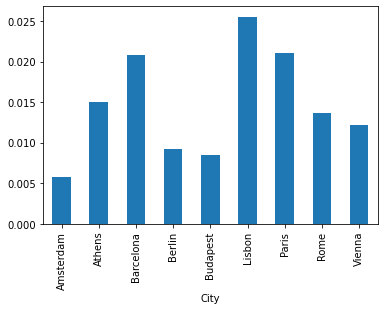

In [15]:
data['perc_bad_satisfaction'] =1
data.groupby('City')['perc_bad_satisfaction'].count())
data2.plot(kind='bar')


<AxesSubplot:title={'center':'Price'}, xlabel='[Guest_Satisfaction]'>

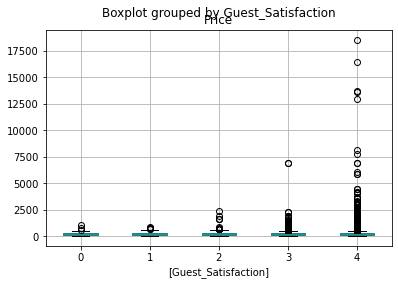

In [31]:
data[['Guest_Satisfaction','Price']].boxplot(by='Guest_Satisfaction')


<AxesSubplot:title={'center':'Bedrooms'}, xlabel='[Guest_Satisfaction]'>

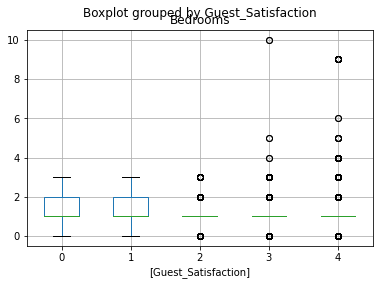

In [32]:
data[['Guest_Satisfaction','Bedrooms']].boxplot(by='Guest_Satisfaction')


<AxesSubplot:title={'center':'City Center (km)'}, xlabel='[Guest_Satisfaction]'>

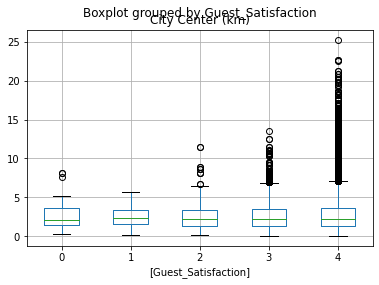

In [33]:
data[['Guest_Satisfaction','City Center (km)']].boxplot(by='Guest_Satisfaction')


<AxesSubplot:title={'center':'Metro Distance (km)'}, xlabel='[Guest_Satisfaction]'>

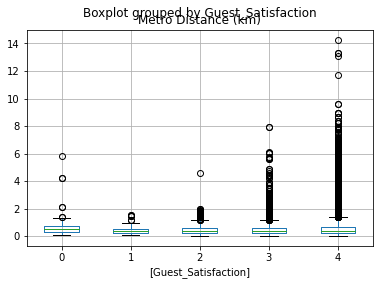

In [34]:
data[['Guest_Satisfaction','Metro Distance (km)']].boxplot(by='Guest_Satisfaction')



<AxesSubplot:title={'center':'Attraction Index'}, xlabel='[Guest_Satisfaction]'>

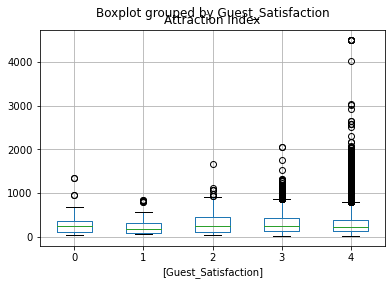

In [35]:
data[['Guest_Satisfaction','Attraction Index']].boxplot(by='Guest_Satisfaction')



<AxesSubplot:title={'center':'Restraunt Index'}, xlabel='[Guest_Satisfaction]'>

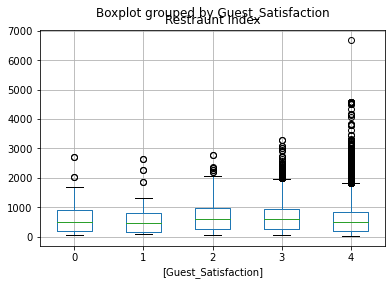

In [36]:
data[['Guest_Satisfaction','Restraunt Index']].boxplot(by='Guest_Satisfaction')



In [4]:
x_columns = ['City_st','Weekend_st','Entire_room_st','Shared Room','Superhost_st','Multiple Rooms',
             'Business','Cleanliness Rating', 'Price', 'Bedrooms',
               'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
               'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index']

data_scale = pd.DataFrame(scale(data[x_columns]),columns=x_columns)
data_scale['Guest_Satisfaction'] = data['Guest_Satisfaction']
data_scale.head()



,City_st,Weekend_st,Entire_room_st,Shared Room,Superhost_st,Multiple Rooms,Business,Cleanliness Rating,Price,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Guest_Satisfaction
0,0.0,-0.998611,-1.449625,-0.087368,-0.622834,1.544895,-0.719629,0.627249,-0.236433,-0.260033,1.173545,2.740676,-0.912908,-0.901408,-1.014982,-1.012052,4
1,0.0,-0.998611,-1.449625,-0.087368,-0.622834,-0.647293,-0.719629,-1.622059,0.301180,-0.260033,-1.097534,-0.516168,1.430644,2.589974,0.404481,1.773897,4
2,0.0,-0.998611,-1.449625,-0.087368,-0.622834,-0.647293,1.389604,-0.497405,0.014341,-0.260033,1.536826,4.315647,-0.927392,-0.922985,-1.020489,-1.022859,4
3,0.0,-0.998611,-1.449625,-0.087368,-0.622834,-0.647293,1.389604,-0.497405,0.620729,1.307000,-1.149384,-0.232293,0.845679,1.718504,0.476992,1.916214,4
4,0.0,-0.998611,-1.449625,-0.087368,1.605564,-0.647293,-0.719629,0.627249,0.806923,-0.260033,-1.069313,-0.403893,1.098313,2.094874,0.362273,1.691057,4


In [5]:
formula = 'Q("Guest_Satisfaction") ~ ' + ' + '.join(['Q("'+x+'")' \
                                    for x in x_columns])
print(formula)

Q("Guest_Satisfaction") ~ Q("City_st") + Q("Weekend_st") + Q("Entire_room_st") + Q("Shared Room") + Q("Superhost_st") + Q("Multiple Rooms") + Q("Business") + Q("Cleanliness Rating") + Q("Price") + Q("Bedrooms") + Q("City Center (km)") + Q("Metro Distance (km)") + Q("Attraction Index") + Q("Normalised Attraction Index") + Q("Restraunt Index") + Q("Normalised Restraunt Index")


In [6]:
Y, X = dmatrices(formula,data_scale,return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)



In [7]:
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)

model.fit(X_train, y_train)
y_pred =  model.predict(X_test)


In [8]:
report = classification_report(y_test,y_pred,output_dict=True)
report = pd.DataFrame(report)
resumen = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot'])
nresumen = len(resumen)
resumen.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].mean()
resumen.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].mean()
resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].mean()
resumen.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].mean()
resumen.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].mean()
resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].mean()
resumen


,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
0,0.241771,0.598002,0.384264,0.467643,0.709408,0.564349


In [12]:
confusion_m = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'],index=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'])
confusion_m


,0.EX_LOW,1.LOW,2.MEDIUM,3.HIGH,4.EX_HIGH
0.EX_LOW,11,1,3,3,2
1.LOW,7,4,2,8,8
2.MEDIUM,3,1,4,59,40
3.HIGH,0,1,4,151,573
4.EX_HIGH,0,0,0,83,7375


In [37]:
report['0.0'] = report['0.0']*sum(y_train==0)[0]
report


,0.0,1.0,2.0,3.0,4.0,accuracy,macro avg,weighted avg
precision,31.285714,0.333333,0.204545,0.473945,0.928045,0.900396,0.473688,0.875823
recall,32.850000,0.103448,0.084112,0.262003,0.978815,0.900396,0.375676,0.900396
f1-score,32.048780,0.157895,0.119205,0.337456,0.952754,0.900396,0.401267,0.884305
support,1460.000000,29.000000,107.000000,729.000000,7458.000000,0.900396,8343.000000,8343.000000


73

In [64]:
n_neighbors = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130]
resumen = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot','acc_mal','acc_bien','acc_tot'])

for K in n_neighbors:
    
    model = neighbors.KNeighborsClassifier(n_neighbors=K,
                                           weights='uniform',
                                           p=2)

    model.fit(X_train, y_train)
    y_pred =  model.predict(X_test)

    report_prev = classification_report(y_test,y_pred,output_dict=True)
    report = pd.DataFrame(report_prev)

    report['0.0'] = report['0.0']*sum(y_train==0)[0]
    report['1.0'] = report['1.0']*sum(y_train==1)[0]
    report['2.0'] = report['2.0']*sum(y_train==2)[0]
    report['3.0'] = report['3.0']*sum(y_train==3)[0]
    report['4.0'] = report['4.0']*sum(y_train==4)[0]
    nresumen = len(resumen)
    resumen.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_train<=2)[0]
    resumen.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_train>2)[0]
    resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train)
    resumen.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_train<=2)[0]
    resumen.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_train>2)[0]
    resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train)

    print (K,'finished')

    
  



5 finished
10 finished
15 finished
20 finished
25 finished
30 finished
35 finished
40 finished
45 finished
50 finished
55 finished
60 finished
65 finished
70 finished
75 finished
80 finished
85 finished
90 finished
95 finished
100 finished
105 finished
110 finished
115 finished
120 finished
125 finished
130 finished


In [65]:
resumen.index = n_neighbors
resumen

,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
5,0.140066,0.913799,0.90209,0.257331,0.886857,0.877331
10,0.147294,0.916672,0.905029,0.414816,0.885065,0.877949
15,0.127413,0.917966,0.906003,0.380713,0.883522,0.875913
20,0.122663,0.918441,0.906399,0.351909,0.883375,0.875333
25,0.123377,0.919285,0.90724,0.343636,0.884019,0.875841
30,0.116149,0.918645,0.906501,0.34082,0.881879,0.873691
35,0.1114,0.919618,0.907387,0.307201,0.882845,0.874134
40,0.1114,0.919738,0.907505,0.330435,0.883047,0.874684
45,0.09396,0.919352,0.906861,0.085419,0.881605,0.869557
50,0.09396,0.918974,0.906489,0.085419,0.880992,0.868953


<AxesSubplot:>

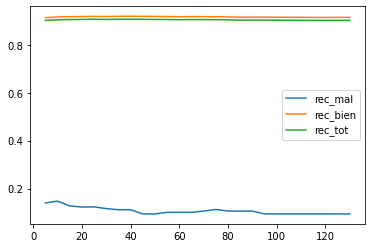

In [66]:
resumen[['rec_mal','rec_bien','rec_tot']].plot()

<AxesSubplot:>

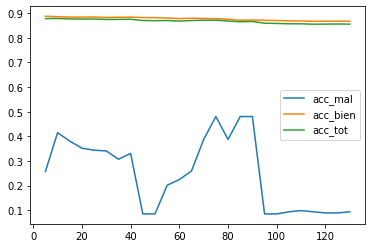

In [67]:
resumen[['acc_mal','acc_bien','acc_tot']].plot()

In [71]:
def cv_accuracy_recall_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
 

    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform',
                                           p=2)
    
    resumen_cv = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot','acc_mal','acc_bien','acc_tot'])
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)    
    kfold = KFold(n_splits=5, shuffle=True,random_state=765).split(X, y)   
    
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train_cv = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train_cv = y.iloc[train]
        y_holdout = y.iloc[holdout]
        
        # Fit the model
        model.fit(X_train_cv, y_train_cv)
            
        y_holdoutpred =  model.predict(X_test)

        report = classification_report(y_test,y_holdoutpred,output_dict=True)
        report = pd.DataFrame(report)

        report['0.0'] = report['0.0']*sum(y_train_cv==0)[0]
        report['1.0'] = report['1.0']*sum(y_train_cv==1)[0]
        report['2.0'] = report['2.0']*sum(y_train_cv==2)[0]
        report['3.0'] = report['3.0']*sum(y_train_cv==3)[0]
        report['4.0'] = report['4.0']*sum(y_train_cv==4)[0]
        nresumen = len(resumen_cv)
        resumen_cv.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_train_cv<=2)[0]
        resumen_cv.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_train_cv>2)[0]
        resumen_cv.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_cv)
        resumen_cv.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_train_cv<=2)[0]
        resumen_cv.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_train_cv>2)[0]
        resumen_cv.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_cv)

    return resumen_cv.mean()



In [77]:
n_neighbors = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
resumen_results_cv = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot','acc_mal','acc_bien','acc_tot'])
for K in n_neighbors:
    tot = cv_accuracy_recall_score(X_train, y_train, K)
    resumen_results_cv.loc[len(resumen_results_cv)] = tot
    print(K," finished")



5  finished
10  finished
15  finished
20  finished
25  finished
30  finished
35  finished
40  finished
45  finished
50  finished
55  finished
60  finished
65  finished
70  finished
75  finished
80  finished
85  finished
90  finished
95  finished
100  finished


In [78]:
resumen_results_cv.index = n_neighbors
resumen_results_cv

,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
5,0.167157,0.913071,0.901782,0.321592,0.885181,0.876647
10,0.139390,0.916666,0.904904,0.405080,0.884239,0.876986
15,0.128454,0.917785,0.905842,0.381679,0.882766,0.875192
20,0.121939,0.918190,0.906141,0.362288,0.882457,0.874593
25,0.117241,0.918574,0.906448,0.347335,0.882145,0.874047
30,0.109404,0.919109,0.906856,0.282772,0.882162,0.873104
35,0.110105,0.919092,0.906849,0.302039,0.881820,0.873046
40,0.105035,0.918387,0.906078,0.242007,0.879878,0.870235
45,0.103832,0.917927,0.905607,0.273260,0.878411,0.869254
50,0.106335,0.918090,0.905806,0.311444,0.878561,0.869981


<AxesSubplot:>

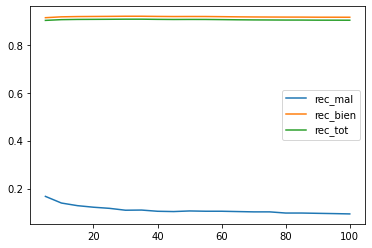

In [112]:
resumen_results_cv[['rec_mal','rec_bien','rec_tot']].plot()


<AxesSubplot:>

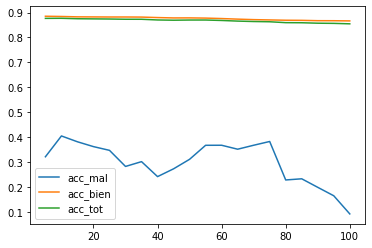

In [80]:
resumen_results_cv[['acc_mal','acc_bien','acc_tot']].plot()


In [ ]:
resumen_results_cv[['acc_mal','acc_bien','acc_tot']].plot()



In [22]:
nn=10
resumen = pd.DataFrame()
model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                       weights='uniform',
                                       p=2)

model.fit(X_train, y_train)
y_pred =  model.predict(X_test)

report_prev = classification_report(y_test,y_pred,output_dict=True)
report = pd.DataFrame(report_prev)

report['0.0'] = report['0.0']*sum(y_test==0)[0]
report['1.0'] = report['1.0']*sum(y_test==1)[0]
report['2.0'] = report['2.0']*sum(y_test==2)[0]
report['3.0'] = report['3.0']*sum(y_test==3)[0]
report['4.0'] = report['4.0']*sum(y_test==4)[0]
nresumen = len(resumen)
resumen.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_test<=2)[0]
resumen.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_test>2)[0]
resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_test<=2)[0]
resumen.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_test>2)[0]
resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen


,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
0,0.141026,0.917919,0.903392,0.419512,0.885785,0.877067


In [23]:
report2 = pd.DataFrame(report_prev)
report2

,0.0,1.0,2.0,3.0,4.0,accuracy,macro avg,weighted avg
precision,0.476190,0.600000,0.360000,0.489914,0.924481,0.903392,0.570117,0.877067
recall,0.500000,0.103448,0.084112,0.233196,0.984848,0.903392,0.381121,0.903392
f1-score,0.487805,0.176471,0.136364,0.315985,0.953710,0.903392,0.414067,0.883686
support,20.000000,29.000000,107.000000,729.000000,7458.000000,0.903392,8343.000000,8343.000000


In [24]:
report2.columns = ['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH','accuracy','macro avg','weighted avg']
report2.iloc[0:3,][['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH']].applymap('{:.2%}'.format)



,0.EX_LOW,1.LOW,2.MEDIUM,3.HIGH,4.EX_HIGH
precision,47.62%,60.00%,36.00%,48.99%,92.45%
recall,50.00%,10.34%,8.41%,23.32%,98.48%
f1-score,48.78%,17.65%,13.64%,31.60%,95.37%


In [25]:
confusion_m2 = pd.DataFrame(confusion_matrix(y_test['Q("Guest_Satisfaction")'],y_pred),columns=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'],index=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'])
confusion_m2


,0.EX_LOW,1.LOW,2.MEDIUM,3.HIGH,4.EX_HIGH
0.EX_LOW,10,0,6,2,2
1.LOW,8,3,4,7,7
2.MEDIUM,3,1,9,55,39
3.HIGH,0,1,6,170,552
4.EX_HIGH,0,0,0,113,7345


In [90]:
##MODELO BALANCEANDO CATEGORIAS

In [13]:
y_train.value_counts()

Q("Guest_Satisfaction")
4.0                        29885
3.0                         2981
2.0                          352
1.0                           80
0.0                           73
dtype: int64

In [14]:
sample_amounts = {0:29885, 1:29885, 2:29885, 3:29885, 4:29885}
y_train.value_counts()


Q("Guest_Satisfaction")
4.0                        29885
3.0                         2981
2.0                          352
1.0                           80
0.0                           73
dtype: int64

In [15]:
data_train = X_train.join(y_train,how='left')
data_train.head()


,Intercept,"Q(""City_st"")","Q(""Weekend_st"")","Q(""Entire_room_st"")","Q(""Shared Room"")","Q(""Superhost_st"")","Q(""Multiple Rooms"")","Q(""Business"")","Q(""Cleanliness Rating"")","Q(""Price"")","Q(""Bedrooms"")","Q(""City Center (km)"")","Q(""Metro Distance (km)"")","Q(""Attraction Index"")","Q(""Normalised Attraction Index"")","Q(""Restraunt Index"")","Q(""Normalised Restraunt Index"")","Q(""Guest_Satisfaction"")"
37927,1.0,0.0,1.001391,0.689834,-0.087368,-0.622834,-0.647293,1.389604,0.627249,-0.228016,-0.260033,0.506596,1.235313,0.334605,-0.412979,0.726450,-0.197953,4.0
30474,1.0,0.0,-0.998611,-1.449625,-0.087368,-0.622834,1.544895,-0.719629,-0.497405,-0.336794,-0.260033,0.660794,2.249219,0.277607,-0.448304,0.613860,-0.267802,4.0
9070,1.0,0.0,1.001391,-1.449625,-0.087368,1.605564,1.544895,-0.719629,0.627249,-0.475250,-0.260033,-0.201137,-0.401431,1.282916,1.349328,-0.003936,-0.640124,4.0
33108,1.0,0.0,-0.998611,0.689834,-0.087368,1.605564,1.544895,-0.719629,0.627249,-0.291609,-0.260033,1.059767,0.386752,0.145159,-0.530883,0.195174,-0.524567,4.0
8087,1.0,0.0,-0.998611,-1.449625,-0.087368,1.605564,-0.647293,1.389604,0.627249,-0.110409,-0.260033,-0.663786,-0.078390,0.963495,0.720662,1.133760,0.066852,4.0


In [16]:
random.seed(10)
data_train_balance = data_train.groupby('Q("Guest_Satisfaction")').apply(lambda g: g.sample(
        n=sample_amounts[g.name],
        replace=len(g) < sample_amounts[g.name]
    ))
    
data_train_balance

Intercept  Q("City_st")  Q("Weekend_st")  \
Q("Guest_Satisfaction")                                                   
0.0                     19447        1.0           0.0        -0.998611   
                        31286        1.0           0.0        -0.998611   
                        32681        1.0           0.0        -0.998611   
                        18850        1.0           0.0        -0.998611   
                        36092        1.0           0.0         1.001391   
...                                  ...           ...              ...   
4.0                     4456         1.0           0.0        -0.998611   
                        38409        1.0           0.0        -0.998611   
                        34008        1.0           0.0         1.001391   
                        4118         1.0           0.0        -0.998611   
                        8602         1.0           0.0        -0.998611   

                               Q("Entire_room_st")  Q("Shared Room")  \
Q("Guest_Satisfaction")                                                
0.0                     19447            -1.449625         -0.087368   
                        31286            -1.449625         -0.087368   
                        32681            -1.449625         -0.087368   
                        18850             0.689834         -0.087368   
                        36092            -1.449625         -0.087368   
...                                            ...               ...   
4.0                     4456              0.689834         -0.087368   
                        38409             0.689834         -0.087368   
                        34008            -1.449625         -0.087368   
                        4118              0.689834         -0.087368   
                        8602             -1.449625         -0.087368   

                               Q("Superhost_st")  Q("Multiple Rooms")  \
Q("Guest_Satisfaction")                                                 
0.0                     19447          -0.622834            -0.647293   
                        31286          -0.622834            -0.647293   
                        32681          -0.622834            -0.647293   
                        18850          -0.622834            -0.647293   
                        36092          -0.622834            -0.647293   
...                                          ...                  ...   
4.0                     4456            1.605564             1.544895   
                        38409          -0.622834             1.544895   
                        34008          -0.622834             1.544895   
                        4118           -0.622834            -0.647293   
                        8602           -0.622834             1.544895   

                               Q("Business")  Q("Cleanliness Rating")  \
Q("Guest_Satisfaction")                                                 
0.0                     19447       1.389604                -3.871367   
                        31286       1.389604                -8.369982   
                        32681      -0.719629                -8.369982   
                        18850       1.389604                -8.369982   
                        36092       1.389604                -3.871367   
...                                      ...                      ...   
4.0                     4456       -0.719629                 0.627249   
                        38409      -0.719629                 0.627249   
                        34008      -0.719629                -0.497405   
                        4118       -0.719629                 0.627249   
                        8602       -0.719629                 0.627249   

                               Q("Price")  Q("Bedrooms")  \
Q("Guest_Satisfaction")                                    
0.0                     19447   -0.217430      -0.260033   
                        31286   -0.526

In [17]:
len(data_train_balance)

149425

In [18]:
X_train_balance = data_train_balance[X_train.columns]
y_train_balance = data_train_balance[y_train.columns]
 

In [16]:
n_neighbors = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130]
resumen = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot','acc_mal','acc_bien','acc_tot'])

for K in n_neighbors:
    
    model = neighbors.KNeighborsClassifier(n_neighbors=K,
                                           weights='uniform',
                                           p=2)

    model.fit(X_train_balance, y_train_balance)
    y_pred =  model.predict(X_test)

    report_prev = classification_report(y_test,y_pred,output_dict=True)
    report = pd.DataFrame(report_prev)

    report['0.0'] = report['0.0']*sum(y_train_balance==0)[0]
    report['1.0'] = report['1.0']*sum(y_train_balance==1)[0]
    report['2.0'] = report['2.0']*sum(y_train_balance==2)[0]
    report['3.0'] = report['3.0']*sum(y_train_balance==3)[0]
    report['4.0'] = report['4.0']*sum(y_train_balance==4)[0]
    nresumen = len(resumen)
    resumen.loc[nresumen,'rec_bad'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_train_balance<=2)[0]
    resumen.loc[nresumen,'rec_good'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_train_balance>2)[0]
    resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_balance)
    resumen.loc[nresumen,'acc_bad'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_train_balance<=2)[0]
    resumen.loc[nresumen,'acc_good'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_train_balance>2)[0]
    resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_balance)

    print (K,'finished')

    
  




5 finished
10 finished
15 finished
20 finished
25 finished
30 finished
35 finished
40 finished
45 finished
50 finished
55 finished
60 finished
65 finished
70 finished
75 finished
80 finished
85 finished
90 finished
95 finished
100 finished
105 finished
110 finished
115 finished
120 finished
125 finished
130 finished


In [17]:
resumen.index = n_neighbors
resumen

,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
5,0.272892,0.684126,0.437385,0.255154,0.60317,0.39436
10,0.276007,0.69286,0.442748,0.214982,0.581996,0.361787
15,0.279122,0.689951,0.443454,0.201693,0.580542,0.353232
20,0.305135,0.689229,0.458772,0.181851,0.580271,0.341219
25,0.337378,0.682531,0.475439,0.176045,0.585522,0.339836
30,0.368654,0.685166,0.495259,0.182112,0.587738,0.344363
35,0.378,0.682427,0.499771,0.173446,0.590791,0.340384
40,0.381115,0.677244,0.499567,0.157268,0.589386,0.330115
45,0.38423,0.665703,0.496819,0.14748,0.588068,0.323715
50,0.393576,0.662599,0.501185,0.1428,0.589311,0.321404


<AxesSubplot:>

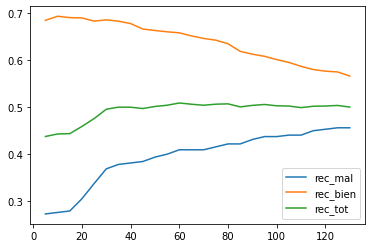

In [18]:
resumen[['rec_mal','rec_bien','rec_tot']].plot()



<AxesSubplot:>

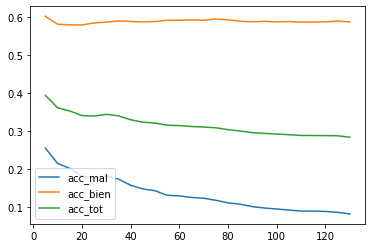

In [19]:
resumen[['acc_mal','acc_bien','acc_tot']].plot()



In [19]:
nn=5
resumen = pd.DataFrame()
model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                       weights='uniform',
                                       p=2)

model.fit(X_train_balance, y_train_balance)
y_pred =  model.predict(X_test)

report_prev = classification_report(y_test,y_pred,output_dict=True)
report = pd.DataFrame(report_prev)

report['0.0'] = report['0.0']*sum(y_test==0)[0]
report['1.0'] = report['1.0']*sum(y_test==1)[0]
report['2.0'] = report['2.0']*sum(y_test==2)[0]
report['3.0'] = report['3.0']*sum(y_test==3)[0]
report['4.0'] = report['4.0']*sum(y_test==4)[0]
nresumen = len(resumen)
resumen.loc[nresumen,'rec_bad'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_test<=2)[0]
resumen.loc[nresumen,'rec_good'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_test>2)[0]
resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen.loc[nresumen,'acc_bad'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_test<=2)[0]
resumen.loc[nresumen,'acc_good'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_test>2)[0]
resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_test)
resumen





,rec_mal,rec_bien,rec_tot,acc_mal,acc_bien,acc_tot
0,0.224359,0.823623,0.812418,0.200727,0.88767,0.874826


In [20]:
report_prev = classification_report(y_test,y_pred,output_dict=True)
report2 = pd.DataFrame(report_prev)
report2.columns = ['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH','accuracy','macro avg','weighted avg']
report2.iloc[0:3,][['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH']].applymap('{:.2%}'.format)


,0.EX_LOW,1.LOW,2.MEDIUM,3.HIGH,4.EX_HIGH
precision,40.91%,19.23%,16.41%,25.70%,94.93%
recall,45.00%,17.24%,19.63%,51.44%,85.38%
f1-score,42.86%,18.18%,17.87%,34.28%,89.91%


In [21]:
confusion_m2 = pd.DataFrame(confusion_matrix(y_test['Q("Guest_Satisfaction")'],y_pred),columns=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'],index=['0.EX_LOW','1.LOW','2.MEDIUM','3.HIGH','4.EX_HIGH'])
confusion_m2

,0.EX_LOW,1.LOW,2.MEDIUM,3.HIGH,4.EX_HIGH
0.EX_LOW,9,2,5,3,1
1.LOW,6,5,2,11,5
2.MEDIUM,5,5,21,57,19
3.HIGH,0,6,33,375,315
4.EX_HIGH,2,8,67,1013,6368


In [26]:
#### middle way

In [ ]:
y_train.value_counts()

In [ ]:
sample_amounts = {0:29885, 1:29885, 2:29885, 3:29885, 4:29885}
y_train.value_counts()



In [ ]:
data_train = X_train.join(y_train,how='left')
data_train.head()



In [ ]:
random.seed(10)
data_train_balance = data_train.groupby('Q("Guest_Satisfaction")').apply(lambda g: g.sample(
        n=sample_amounts[g.name],
        replace=len(g) < sample_amounts[g.name]
    ))
    
data_train_balance

In [ ]:
X_train_balance = data_train_balance[X_train.columns]
y_train_balance = data_train_balance[y_train.columns]
 

In [ ]:
n_neighbors = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130]
resumen = pd.DataFrame(columns=['rec_mal','rec_bien','rec_tot','acc_mal','acc_bien','acc_tot'])

for K in n_neighbors:
    
    model = neighbors.KNeighborsClassifier(n_neighbors=K,
                                           weights='uniform',
                                           p=2)

    model.fit(X_train_balance, y_train_balance)
    y_pred =  model.predict(X_test)

    report_prev = classification_report(y_test,y_pred,output_dict=True)
    report = pd.DataFrame(report_prev)

    report['0.0'] = report['0.0']*sum(y_train_balance==0)[0]
    report['1.0'] = report['1.0']*sum(y_train_balance==1)[0]
    report['2.0'] = report['2.0']*sum(y_train_balance==2)[0]
    report['3.0'] = report['3.0']*sum(y_train_balance==3)[0]
    report['4.0'] = report['4.0']*sum(y_train_balance==4)[0]
    nresumen = len(resumen)
    resumen.loc[nresumen,'rec_mal'] = report.loc['recall'][['0.0', '1.0', '2.0']].sum()/sum(y_train_balance<=2)[0]
    resumen.loc[nresumen,'rec_bien'] = report.loc['recall'][['3.0', '4.0']].sum()/sum(y_train_balance>2)[0]
    resumen.loc[nresumen,'rec_tot'] = report.loc['recall'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_balance)
    resumen.loc[nresumen,'acc_mal'] = report.loc['precision'][['0.0', '1.0', '2.0']].sum()/sum(y_train_balance<=2)[0]
    resumen.loc[nresumen,'acc_bien'] = report.loc['precision'][['3.0', '4.0']].sum()/sum(y_train_balance>2)[0]
    resumen.loc[nresumen,'acc_tot'] = report.loc['precision'][['0.0', '1.0', '2.0','3.0', '4.0']].sum()/len(y_train_balance)

    print (K,'finished')

    
  





In [ ]:
resumen.index = n_neighbors
resumen